In [1]:
%matplotlib inline 

In [2]:
import sympy
from sympy.parsing.sympy_parser import (parse_expr,
                                        standard_transformations,
                                        implicit_application,
                                        implicit_multiplication,
                                        convert_xor)
from sympy import diff
from sympy.plotting import plot
from sympy.abc import x
from math import log10, e, pi

class Function:
    """Класс, инкапсулирующий вычисление скалярной функции, заданной в виде строки
определенного формата"""
    def __init__(self, expr):
        # преобразования для парсера sympy
        transformations = standard_transformations + (implicit_multiplication, # умножение без знака умножения
                                                      implicit_application,  # применение скалярных ф-ий без скобок
                                                      convert_xor) # каретка как символ возведения в степень
        # замены для парсера
        replacers = {'e' : e,
                     'tg' : sympy.functions.tan,
                     'ctg' : sympy.functions.cot,
                     'lg' : sympy.Lambda(x, sympy.functions.log(x) / sympy.functions.log(10))}
        
        expr = expr.lower()
        
        self.fun = parse_expr(expr,
                              transformations = transformations,
                              local_dict=replacers)
        if self.fun.free_symbols - {x} != set():
            raise ValueError('Выражение содержит переменные кроме x')
        
    def __call__(self, arg, deriv=0):
        res = self.fun if deriv == 0 else self.fun.diff(*(x for i in range(0, deriv)))
        return float(res.subs({x : arg}))
    
    def diff(self):
        return diff(self.fun, 'x')
    
    def plot_x(self, dx, rng=5):
        plot(self.fun, (x, dx-rng, dx+rng))
        
    def plot(self, dx1, dx2):
        plot(self.fun, (x, dx1, dx2))

In [10]:
from math import sqrt
phi_ = (sqrt(5)+1)/2



def dichotomy(f: Function, a: float, b: float, eps: float=1e-7):
    c = (a+b)/2
    while abs(f(c)) >= eps or (b-a)/2 > eps:
        c = (a+b)/2
        if f(a)*f(c) <= 0:
            b = c
        else:
            a = c
            
    x_ = (b+a)/2
    return {'Name':'Метод дихотомии' ,'x*':x_, 'f(x*)': abs(f(x_)), 'eps*': (b-a)/2}


def chord(f: Function, a: float, b: float, eps: float=1e-7):
    c = (a+b)/2
    while abs(f(c)) > eps:
        c = a - (f(a)/(f(b)-f(a)))*(b-a)
        #a = b - (f(b)/(f(a)-f(b)))*(a-b)
        if f(a)*f(c) <= 0:
            b = c
        else:
            a = c
    x_ = a - (f(a)/(f(b)-f(a)))*(b-a)
    return {'Name':'Метод хорд' ,'x*':x_, 'f(x*)': f(x_), 'eps*': abs(c-x_)/2}


def newton(f: Function, a: float, b: float, eps: float=1e-7): #Метод Ньютона
    
    
    def phi(arg, f):
        return arg - (f(arg)/ f(arg,1))
    
    if f(a)*f(a,2) > 0:
        x_ = a
    elif f(b)*f(b,2) > 0:
        x_ = b
    else:
        c = a - (f(a)/(f(b)-f(a)))*(b-a)
        if f(a) * f(c) < 0:
            x_ = a
        else:
            x_ = c
            
            
    x__ = phi(x_, f)
    
    while abs(x__- x_) > eps or abs(f(x__)) > eps:
        x_ , x__ = x__, phi(x_, f)
        
    return {'Name':'Метод Ньютона' ,'x*':x__, 'f(x*)': abs(f(x__)), 'eps*': abs(x__ - x_)/2}    
    

    
        
def combined(f: Function, a: float, b: float, eps: float=1e-7):  # Комбинированный метод
    
    while abs((b-a)/2) > eps or abs(f((b+a)/2)) > eps:
        
        print('a:')
        print('f(a) = ', f(a), ' f\'\'(a) = ', f(a,2))
        
        if f(a)*f(a, 2) <= 0:
            a = a - (f(a)*(a-b)) / (f(a)-f(b))
            print('хорд a = ', a)
        else:
            a = a - f(a)/f(a, 1)
            print('ньютон a = ', a)
        
        print('b:')
        print('f(b) = ', f(b), ' f\'\'(b) = ', f(b,2))
        if f(b)*f(b, 2) <= 0:
            b = b - (f(b)*(b-a)) / (f(b)-f(a))
            print('хорд b = ', b)
        else:
            b = b - f(b)/f(b, 1)
            print('ньютон b = ', b)
    print('конец')
    x_ = (a+b)/2
    print('x* = ', x_)
        
    return {'Name':'Комбинированный метод' ,'x*':x_, 'f(x*)': abs(f(x_)), 'eps*': (b-a)/2}

'''
def gld(f, a, b, eps=1e-7):
    x_1 = b - (b - a) / phi_
    x_2 = a + (b - a) / phi_
    y1 = f(x_1)
    y2 = f(x_2)
    if '''
    

    

    
def extrem_1(f, a, b, eps=1e-1): # Итеративный
    Max = abs(f(a,1))
    
    x_max = x_ = a
    while x_ < b:
        m = abs(f(x_,1))
        if m > Max: 
            Max = m
            x_max = x_
        x_ += eps
        #print('x: {:f} f(x): {:f} Max: {:f} x_max: {}'.format(x_, m, Max, x_max))
    return Max
    

def iterative(f: Function, a: float, b: float, eps: float=1e-7): # Итеративный
    Max_f = extrem_1(f, a, b, 1e-1)
    if (f(a) > f(b)):
        phi = lambda x, f: (f(x) / Max_f) - x
    else:
        phi = lambda x, f: x - (f(x) / Max_f)
    
    x_n_1 = (a+b)/2
            
    x_n = phi(x_n_1, f)
    
    while abs(x_n - x_n_1) > eps or abs(f(x_n)) > eps:
        
        x_n, x_n_1 = x_n_1, phi(x_n, f)
        
        #print('x_n: {} f(x_n): {}  x_n-1: {}'.format(x_n, f(x_n), x_n_1))
        
    return {'Name':'Метод простых итераций' ,'x*':x_n, 'f(x*)': abs(f(x_n)), 'eps*': abs(x_n - x_n_1)}

    
def golden_section(f: Function, a: float, b: float, eps: float=1e-7): #Метод Золотого сечения): 
    d = a + (b-a)/phi_
    c = b - d + a
    x_ = (a+b)/2
    while abs(f(x_)) > eps or abs((b-a)/2) > eps:
        if f(a)*f(d) <= 0:
            b = d
        else:
            a = c
        d = a + (b-a)/phi_
        c = b - d + a
        
        x_ = (a+b) / 2
    
    return {'Name':'Метод золотого сечения' ,'x*':x_, 'f(x*)': f(x_), 'eps*': abs((b-a)/2)}


In [7]:
string = 'cos(x)'
a, b = 0.0, 3.0

In [6]:
#string = 'sin x'
#a, b = 3.0, 3.5

In [7]:
string = 'x^2-4'
a, b = -1, 3

In [8]:
string = '-x^2-8+11'
a, b = -5.0, 0

In [12]:
string = '3x^3+2x^2-3x+10'
a, b = -10, 10

In [4]:
string = 'x'
a, b = -10, 10

cos(x)


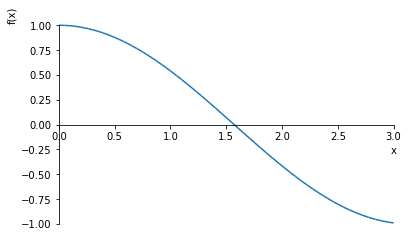

In [11]:
f = Function(string)
print(f.fun)
f.plot(a,b)
#z = Function(str(f.diff()))
#z.plot(a,b)


In [7]:
from sympy import solve
l_x = solve(f.fun)
for l in l_x:
    print(l)

0


In [15]:
#si = Function('cos x')
#si.plot(-2, 1.5)

In [12]:
iterative(f, a, b)

{'Name': 'Метод простых итераций',
 'x*': 1.5707963266742275,
 'f(x*)': 1.206690915558236e-10,
 'eps*': 1.2066903032348364e-10}

In [9]:
dichotomy(f, a, b)

{'Name': 'Метод дихотомии',
 'x*': -3.725290298461914e-08,
 'f(x*)': 3.725290298461914e-08,
 'eps*': 3.725290298461914e-08}

In [10]:
chord(f, a, b)

{'Name': 'Метод хорд', 'x*': 0.0, 'f(x*)': 0.0, 'eps*': 0.0}

In [11]:
newton(f, a, b)

{'Name': 'Метод Ньютона', 'x*': 0.0, 'f(x*)': 0.0, 'eps*': 0.0}

In [12]:
golden_section(f, a, b)

{'Name': 'Метод золотого сечения',
 'x*': -6.91393673986087e-16,
 'f(x*)': -6.91393673986087e-16,
 'eps*': 7.071019424062068e-08}

In [13]:
combined(f, a, b)

a:
f(a) =  -10.0  f''(a) =  0.0
хорд a =  0.0
b:
f(b) =  10.0  f''(b) =  0.0
хорд b =  0.0
конец
x* =  0.0


{'Name': 'Комбинированный метод', 'x*': 0.0, 'f(x*)': 0.0, 'eps*': 0.0}


from sympy.parsing.sympy_parser import (parse_expr,
                                        standard_transformations,
                                        implicit_application,
                                        implicit_multiplication)
from sympy.plotting import plot
from sympy.abc import x

class Function:
    def __init__(self, expr):
        transformations = standard_transformations + (implicit_application,
                                                      implicit_multiplication)
        self.fun = parse_expr(expr.replace('^', '**'),
        transformations=transformations)

    def __call__(self, arg):
        return float(self.fun.subs({x : arg}))
    
    def plot_x(self, dx, rng=5):
        plot(self.fun, (x, dx-rng, dx+rng))
        
    def plot(self, dx1, dx2):
        plot(self.fun, (x, dx1, dx2))

In [34]:
    !jt -r

Reset css and font defaults in:
C:\Users\KrimsN\.jupyter\custom &
C:\Users\KrimsN\AppData\Roaming\jupyter\nbextensions
